# Dense - Mannequin Challenge
# Video

## Requisitos

Python 3.6

In [1]:
!python --version

Python 3.6.9


Pytorch 1.1 o superior

In [2]:
import torch
print(torch.__version__)

1.4.0


## Instalar dependencias

In [3]:
pip install torch torchvision scikit-image h5py

## Descargar el repositorio

In [4]:
!git clone https://github.com/google/mannequinchallenge

Cloning into 'mannequinchallenge'...
remote: Enumerating objects: 205, done.
remote: Total 205 (delta 0), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (205/205), 1.05 MiB | 2.43 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [5]:
cd /content/mannequinchallenge/

/content/mannequinchallenge


## Descargar checkpoints

In [6]:
!./fetch_checkpoints.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.6M  100 20.6M    0     0  22.3M      0 --:--:-- --:--:-- --:--:-- 22.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.6M  100 20.6M    0     0  20.6M      0  0:00:01  0:00:01 --:--:-- 20.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.7M  100 20.7M    0     0  20.6M      0  0:00:01  0:00:01 --:--:-- 20.6M


## Descargar los datos

In [7]:
!./fetch_davis_data.sh

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: DAVIS/JPEGImages/480p/elephant/00031.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00019.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00068.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00078.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00032.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00055.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00023.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00053.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00018.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00004.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00020.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00067.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00026.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00057.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00071.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant/00028.jpg  
  inflating: DAVIS/JPEGImages/480p/elephant

## Se copia el video

In [0]:
cp /content/drive/My\ Drive/Colab\ Notebooks/Dense\ -\ Mannequin\ Challenge/Los_ases_de_la_bachata_show.mp4 /content/sample_data/

## Se obtienen los frames del video de entrada

In [9]:
%cd /content
!mkdir input_frames
!mkdir output_frames
!mkdir output_video
%cd /content/mannequinchallenge

/content
/content/mannequinchallenge


In [10]:
import cv2
import numpy as np

# Barra de progreso
from ipywidgets import IntProgress
from IPython.display import display
import time
 
# Create a VideoCapture object
cap = cv2.VideoCapture('/content/sample_data/Los_ases_de_la_bachata_show.mp4')

# get total number of frames
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

# print progress bar
f = IntProgress(min=0, max=totalFrames) # instantiate the bar
display(f) # display the bar
 
# Check if camera opened successfully
if (cap.isOpened() == False): 
  print("Unable to read camera feed")

num_frame = 0

while(True):
  ret, frame = cap.read()
 
  if ret == True:

    # save frame as PNG file
    cv2.imwrite("/content/input_frames/frame%05d.png" % num_frame, frame)
    
    f.value += 1
    num_frame += 1
 
  # Break the loop
  else:
    break 
 
# When everything done, release the video capture and video write objects
cap.release()

IntProgress(value=0, max=5861)

In [11]:
!ls /content/input_frames

frame00000.png	frame01173.png	frame02346.png	frame03519.png	frame04692.png
frame00001.png	frame01174.png	frame02347.png	frame03520.png	frame04693.png
frame00002.png	frame01175.png	frame02348.png	frame03521.png	frame04694.png
frame00003.png	frame01176.png	frame02349.png	frame03522.png	frame04695.png
frame00004.png	frame01177.png	frame02350.png	frame03523.png	frame04696.png
frame00005.png	frame01178.png	frame02351.png	frame03524.png	frame04697.png
frame00006.png	frame01179.png	frame02352.png	frame03525.png	frame04698.png
frame00007.png	frame01180.png	frame02353.png	frame03526.png	frame04699.png
frame00008.png	frame01181.png	frame02354.png	frame03527.png	frame04700.png
frame00009.png	frame01182.png	frame02355.png	frame03528.png	frame04701.png
frame00010.png	frame01183.png	frame02356.png	frame03529.png	frame04702.png
frame00011.png	frame01184.png	frame02357.png	frame03530.png	frame04703.png
frame00012.png	frame01185.png	frame02358.png	frame03531.png	frame04704.png
frame00013.png	frame01186

## Se genera el video_list.txt

In [0]:
%cd /content/mannequinchallenge

In [10]:
%%writefile video_list.txt
test

Writing video_list.txt


In [0]:
for i in range (int(totalFrames)+1):
  if i==1:
    file = open("/content/mannequinchallenge/video_list.txt","w")
    file.write("/content/input_frames/frame%05d.png\n" % (i-1)) 
    file.close()
  #elif i==int(totalFrames):
    #break
  else:
    file = open("/content/mannequinchallenge/video_list.txt","a")
    file.write("/content/input_frames/frame%05d.png\n" % (i-1)) 
    file.close()

In [28]:
cat /content/mannequinchallenge/video_list.txt

/content/input_frames/frame00000.png
/content/input_frames/frame00001.png
/content/input_frames/frame00002.png
/content/input_frames/frame00003.png
/content/input_frames/frame00004.png
/content/input_frames/frame00005.png
/content/input_frames/frame00006.png
/content/input_frames/frame00007.png
/content/input_frames/frame00008.png
/content/input_frames/frame00009.png
/content/input_frames/frame00010.png
/content/input_frames/frame00011.png
/content/input_frames/frame00012.png
/content/input_frames/frame00013.png
/content/input_frames/frame00014.png
/content/input_frames/frame00015.png
/content/input_frames/frame00016.png
/content/input_frames/frame00017.png
/content/input_frames/frame00018.png
/content/input_frames/frame00019.png
/content/input_frames/frame00020.png
/content/input_frames/frame00021.png
/content/input_frames/frame00022.png
/content/input_frames/frame00023.png
/content/input_frames/frame00024.png
/content/input_frames/frame00025.png
/content/input_frames/frame00026.png
/

## Se procesa

In [9]:
%cd /content
!mkdir input_frames
!mkdir output_frames
!mkdir output_video
%cd /content/mannequinchallenge

/content
/content/mannequinchallenge


In [14]:
cat video_list.txt

hola

In [0]:
file = open("/content/mannequinchallenge/video_list.txt","w")
file.write("hola") 
file.close()

In [19]:
import cv2
import numpy as np

# Barra de progreso
from ipywidgets import IntProgress
from IPython.display import display
import time

# Dense
import torch
from options.train_options import TrainOptions
from loaders import aligned_data_loader
from models import pix2pix_model

BATCH_SIZE = 1
#opt = TrainOptions().parse()  # set CUDA_VISIBLE_DEVICES before import torch
eval_num_threads = 2
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
best_epoch = 0
global_step = 0
 
# Create a VideoCapture object
cap = cv2.VideoCapture('/content/sample_data/Los_ases_de_la_bachata_show.mp4')

# get total number of frames
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

# print progress bar
f = IntProgress(min=0, max=totalFrames) # instantiate the bar
display(f) # display the bar
 
# Check if camera opened successfully
if (cap.isOpened() == False): 
  print("Unable to read camera feed")
 
# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
#frame_width = int(cap.get(3))
#frame_height = int(cap.get(4))
 
# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
# out = cv2.VideoWriter('/content/sample_data/Los_ases_de_la_bachata_out.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

num_frame = 0

while(True):
  ret, frame = cap.read()
 
  if ret == True: 
     
    # Write the frame into the file 'output.avi'
    #out.write(frame)

    # To grayscale
    #grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('video gray', grayFrame)
    #cv2.imwrite("/content/output_frames/frame%05d.png" % i, grayFrame)     # save frame as JPEG file
 
    # Display the resulting frame 
    #cv2.imshow('frame',frame)
 
    # Press Q on keyboard to stop recording
    #if cv2.waitKey(1) & 0xFF == ord('q'):
      #break

    cv2.imwrite("/content/input_frames/frame%05d.png" % num_frame, frame)     # save frame as JPEG file

    # Dense
    file = open("/content/mannequinchallenge/video_list.txt","w")
    file.write("/content/input_frames/frame%05d.png" % num_frame) 
    file.close()

    video_list = '/content/mannequinchallenge/video_list.txt'

    video_data_loader = aligned_data_loader.DAVISDataLoader(video_list, BATCH_SIZE)
    video_dataset = video_data_loader.load_data()
    opt = TrainOptions().parse()  # set CUDA_VISIBLE_DEVICES before import torch
    model = pix2pix_model.Pix2PixModel(opt)

    model.switch_to_eval()
    save_path = '/content/output_frames/'

    for i, data in enumerate(video_dataset):
        stacked_img = data[0]
        targets = data[1]
        model.run_and_save_DAVIS(stacked_img, targets, save_path)

    #cv2.imwrite("/content/output_frames/frame%05d.png" % num_frame, grayFrame)     # save frame as JPEG file
    
    f.value += 1
    num_frame += 1
 
  # Break the loop
  else:
    break 
 
# When everything done, release the video capture and video write objects
cap.release()
#out.release()
 
# Closes all the frames
#cv2.destroyAllWindows()

IntProgress(value=0, max=5861)

usage: ipykernel_launcher.py [-h] --input {single_view,two_view,two_view_k}
                             [--simple_keypoints SIMPLE_KEYPOINTS]
                             [--mode MODE] [--human_data_term HUMAN_DATA_TERM]
                             [--batchSize BATCHSIZE] [--loadSize LOADSIZE]
                             [--fineSize FINESIZE] [--output_nc OUTPUT_NC]
                             [--ngf NGF] [--ndf NDF]
                             [--which_model_netG WHICH_MODEL_NETG]
                             [--gpu_ids GPU_IDS] [--name NAME] [--model MODEL]
                             [--nThreads NTHREADS]
                             [--checkpoints_dir CHECKPOINTS_DIR] [--norm NORM]
                             [--serial_batches]
                             [--display_winsize DISPLAY_WINSIZE]
                             [--display_id DISPLAY_ID] [--identity IDENTITY]
                             [--use_dropout]
                             [--max_dataset_size MAX_DATASET_SIZ

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


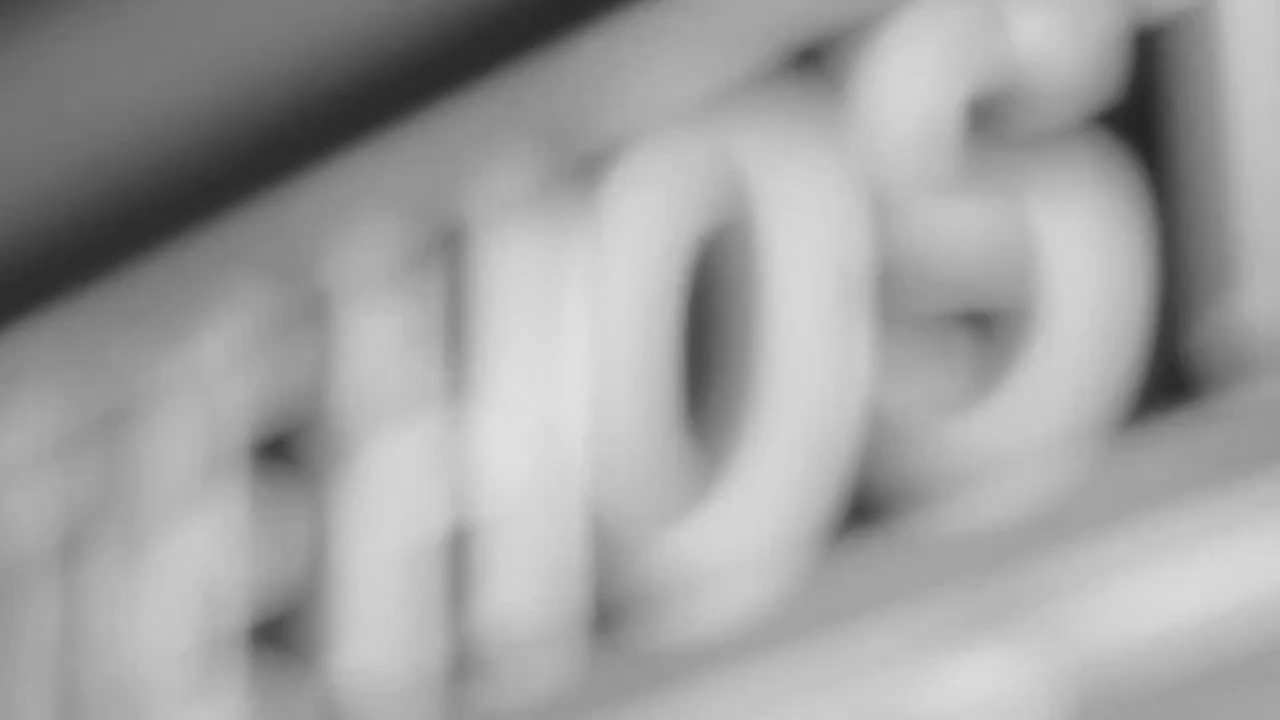

In [5]:
from IPython.display import Image
Image('/content/output_frames/frame00001.png')

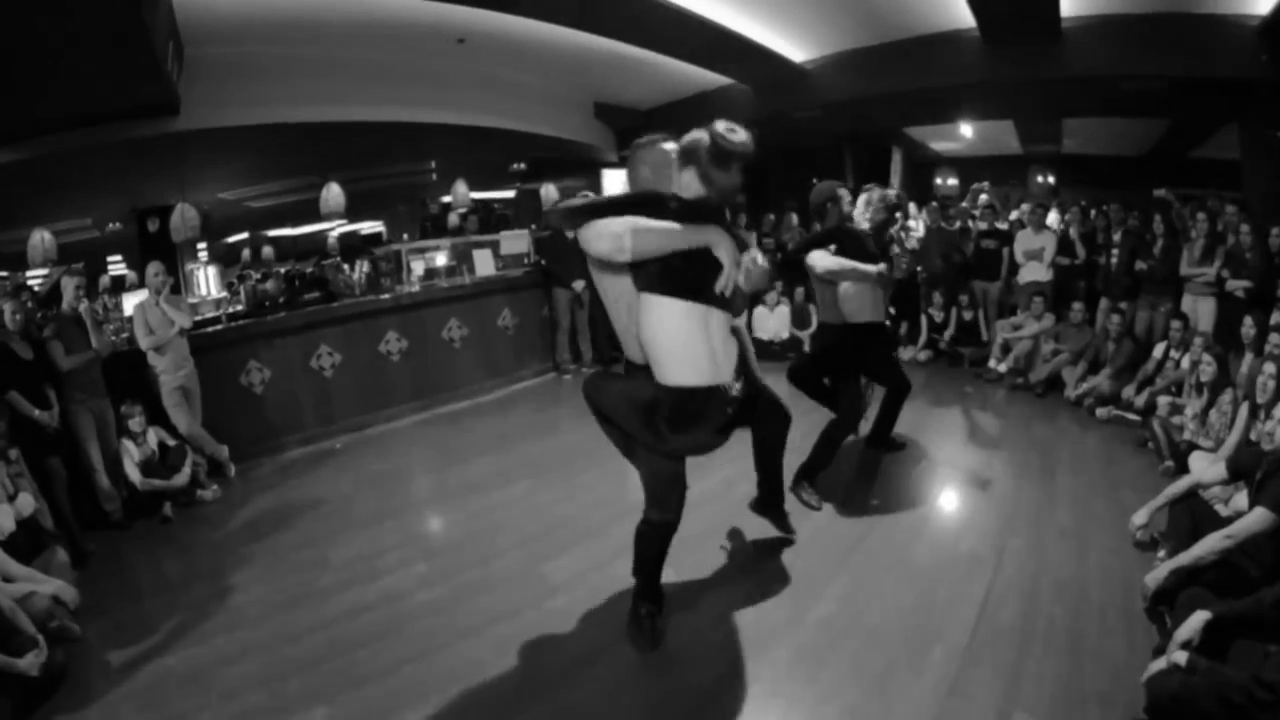

In [6]:
Image('/content/output_frames/frame05000.png')

## Dense

In [31]:
%cd /content/mannequinchallenge

/content/mannequinchallenge
checkpoints	      fetch_tum_data.sh  models     test_davis_videos.py  www
CONTRIBUTING.md       index.html	 options    test_tum.py
fetch_checkpoints.sh  LICENSE		 README.md  util
fetch_davis_data.sh   loaders		 test_data  video_list.txt


In [32]:
%%writefile test_davis_videos.py
# Copyright 2019 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import torch
from options.train_options import TrainOptions
from loaders import aligned_data_loader
from models import pix2pix_model

BATCH_SIZE = 1

opt = TrainOptions().parse()  # set CUDA_VISIBLE_DEVICES before import torch

video_list = '/content/mannequinchallenge/video_list.txt'

eval_num_threads = 2
video_data_loader = aligned_data_loader.DAVISDataLoader(video_list, BATCH_SIZE)
video_dataset = video_data_loader.load_data()
print('========================= Video dataset #images = %d =========' % len(video_data_loader))

model = pix2pix_model.Pix2PixModel(opt)

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
best_epoch = 0
global_step = 0

print('=================================  BEGIN VALIDATION =====================================')

print('TESTING ON VIDEO')

model.switch_to_eval()
save_path = '/content/output_frames/'
print('save_path %s' % save_path)

for i, data in enumerate(video_dataset):
    stacked_img = data[0]
    targets = data[1]
    model.run_and_save_DAVIS(stacked_img, targets, save_path)

Overwriting test_davis_videos.py


In [33]:
!python test_davis_videos.py --input=single_view

Se han truncado las últimas 5000 líneas del flujo de salida.
/content/output_frames/input_frames/frame00862.png
/content/output_frames/input_frames/frame00863.png
/content/output_frames/input_frames/frame00864.png
/content/output_frames/input_frames/frame00865.png
/content/output_frames/input_frames/frame00866.png
/content/output_frames/input_frames/frame00867.png
/content/output_frames/input_frames/frame00868.png
/content/output_frames/input_frames/frame00869.png
/content/output_frames/input_frames/frame00870.png
/content/output_frames/input_frames/frame00871.png
/content/output_frames/input_frames/frame00872.png
/content/output_frames/input_frames/frame00873.png
/content/output_frames/input_frames/frame00874.png
/content/output_frames/input_frames/frame00875.png
/content/output_frames/input_frames/frame00876.png
/content/output_frames/input_frames/frame00877.png
/content/output_frames/input_frames/frame00878.png
/content/output_frames/input_frames/frame00879.png
/content/output_frame

In [35]:
!ls /content/output_frames/input_frames/

frame00000.png	frame01173.png	frame02346.png	frame03519.png	frame04692.png
frame00001.png	frame01174.png	frame02347.png	frame03520.png	frame04693.png
frame00002.png	frame01175.png	frame02348.png	frame03521.png	frame04694.png
frame00003.png	frame01176.png	frame02349.png	frame03522.png	frame04695.png
frame00004.png	frame01177.png	frame02350.png	frame03523.png	frame04696.png
frame00005.png	frame01178.png	frame02351.png	frame03524.png	frame04697.png
frame00006.png	frame01179.png	frame02352.png	frame03525.png	frame04698.png
frame00007.png	frame01180.png	frame02353.png	frame03526.png	frame04699.png
frame00008.png	frame01181.png	frame02354.png	frame03527.png	frame04700.png
frame00009.png	frame01182.png	frame02355.png	frame03528.png	frame04701.png
frame00010.png	frame01183.png	frame02356.png	frame03529.png	frame04702.png
frame00011.png	frame01184.png	frame02357.png	frame03530.png	frame04703.png
frame00012.png	frame01185.png	frame02358.png	frame03531.png	frame04704.png
frame00013.png	frame01186

In [40]:
from IPython.display import Image
Image('/content/output_frames/input_frames/frame03512.jpg')

In [0]:
!cp -r /content/output_frames/input_frames /content/drive/My\ Drive/Colab\ Notebooks/Dense\ -\ Mannequin\ Challenge

## Se crea el video de salida

In [44]:
# Create video
FPS = 25
%cd /content/output_frames/input_frames
%shell ffmpeg -y -r {FPS} -f image2 -pattern_type glob -i '*.png' '/content/output_video/Los_ases_de_la_bachata_out.mp4'
%cd /content

/content/output_frames/input_frames
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --e

In [0]:
!cp /content/output_video/Los_ases_de_la_bachata_out.mp4 /content/drive/My\ Drive/Colab\ Notebooks/Dense\ -\ Mannequin\ Challenge

## Play video

In [47]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/sample_data/Los_ases_de_la_bachata_show.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>


SyntaxError: ignored